**Mini project on Allocation for the welfare of children**

**Introduction**
This dataset contains budget allocation details for various government schemes and ministries in India across multiple financial years. It includes actuals, budget estimates, and revised estimates for each scheme, categorized by sectors like Education, Health, Atomic Energy, Women & Child Development, etc. The data helps analyze trends, growth, and changes in government spending.

In [2]:
import findspark
findspark.init()

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MySparkApp") \
    .getOrCreate()

sc = spark.sparkContext 


In [6]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, when
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

spark = SparkSession.builder.appName("WelfareOfChildren").getOrCreate()


df = spark.read.csv("Allocations_For_The_Welfare_Of_Children.csv", header=True, inferSchema=True)


for old_col in df.columns:
    new_col = old_col.strip().replace(" ", "_").replace("-", "_")
    df = df.withColumnRenamed(old_col, new_col)

required_cols = ["2020_2021_Actuals", "2021_2022_Budget_Estimates",
                 "2021_2022_Revised_Estimates", "2022_2023_Budget_Estimates"]

for c in required_cols:
    df = df.withColumn(c, when(col(c).rlike("^[0-9.]+$"), col(c)).otherwise(None))

for c in required_cols:
    df = df.withColumn(c, col(c).cast("double"))

df = df.na.drop(subset=required_cols)

df = df.na.drop(subset=["Scheme"])
df = df.na.fill(0)

windowSpec = Window.orderBy("Scheme")
df = df.withColumn("index", row_number().over(windowSpec) - 1)

df.show(10, truncate=False)
df.printSchema()


+------------------------------------------------------+------+--------------------------------------------------------------------------------+-----------------+--------------------------+---------------------------+--------------------------+-----+
|Category                                              |Sl.No.|Scheme                                                                          |2020_2021_Actuals|2021_2022_Budget_Estimates|2021_2022_Revised_Estimates|2022_2023_Budget_Estimates|index|
+------------------------------------------------------+------+--------------------------------------------------------------------------------+-----------------+--------------------------+---------------------------+--------------------------+-----+
|Department of Empowerment of Persons with Disabilities|147   |Aids and Appliances                                                             |18.91            |22.0                      |18.0                       |23.5                      |0  

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, regexp_replace

spark = SparkSession.builder.appName("ChildrenWelfareCleaning").getOrCreate()


In [11]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [16]:
df = spark.read.csv("Allocations_For_The_Welfare_Of_Children.csv", header=True, inferSchema=True)


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import functions as F


In [18]:
for col_name in df.columns:
    new_name = col_name.strip().replace(" ", "_").replace("-", "_")
    df = df.withColumnRenamed(col_name, new_name)


In [19]:
num_cols = ["2020_2021_Actuals", "2021_2022_Budget_Estimates", "2021_2022_Revised_Estimates", "2022_2023_Budget_Estimates"]
for c in num_cols:
    df = df.withColumn(c, F.col(c).cast("double"))


In [20]:
df = df.na.drop(subset=["Scheme"])
df = df.na.fill(0)


In [23]:
from pyspark.sql import functions as F

df = spark.read.csv("Allocations_For_The_Welfare_Of_Children.csv", header=True, inferSchema=False)

for col_name in df.columns:
    new_name = col_name.strip().replace(" ", "_").replace("-", "_")
    df = df.withColumnRenamed(col_name, new_name)

invalid_values = ["NA", "N/A", "-", "", "null", "NULL"]
for c in ["2020_2021_Actuals", "2021_2022_Budget_Estimates", "2021_2022_Revised_Estimates", "2022_2023_Budget_Estimates"]:
    df = df.withColumn(c, F.when(F.col(c).isin(invalid_values), None).otherwise(F.col(c)))
    df = df.withColumn(c, F.col(c).cast("double"))

df = df.na.drop(subset=["Scheme"])
df = df.na.fill(0)
pdf = df.toPandas()
pdf.head()


,Category,Sl.No.,Scheme,2020_2021_Actuals,2021_2022_Budget_Estimates,2021_2022_Revised_Estimates,2022_2023_Budget_Estimates
0,Atomic Energy,NA,Total,148.81,174.10,152.00,172.05
1,Atomic Energy,1,Atomic Research Centres,4.10,6.00,3.90,5.00
2,Atomic Energy,2,Other Autonomous Bodies,120.88,138.10,118.10,137.05
3,Atomic Energy,3,Service Units,23.83,30.00,30.00,30.00
4,Ministry of Ayush,NA,Total,1.86,4.32,0.83,1.73


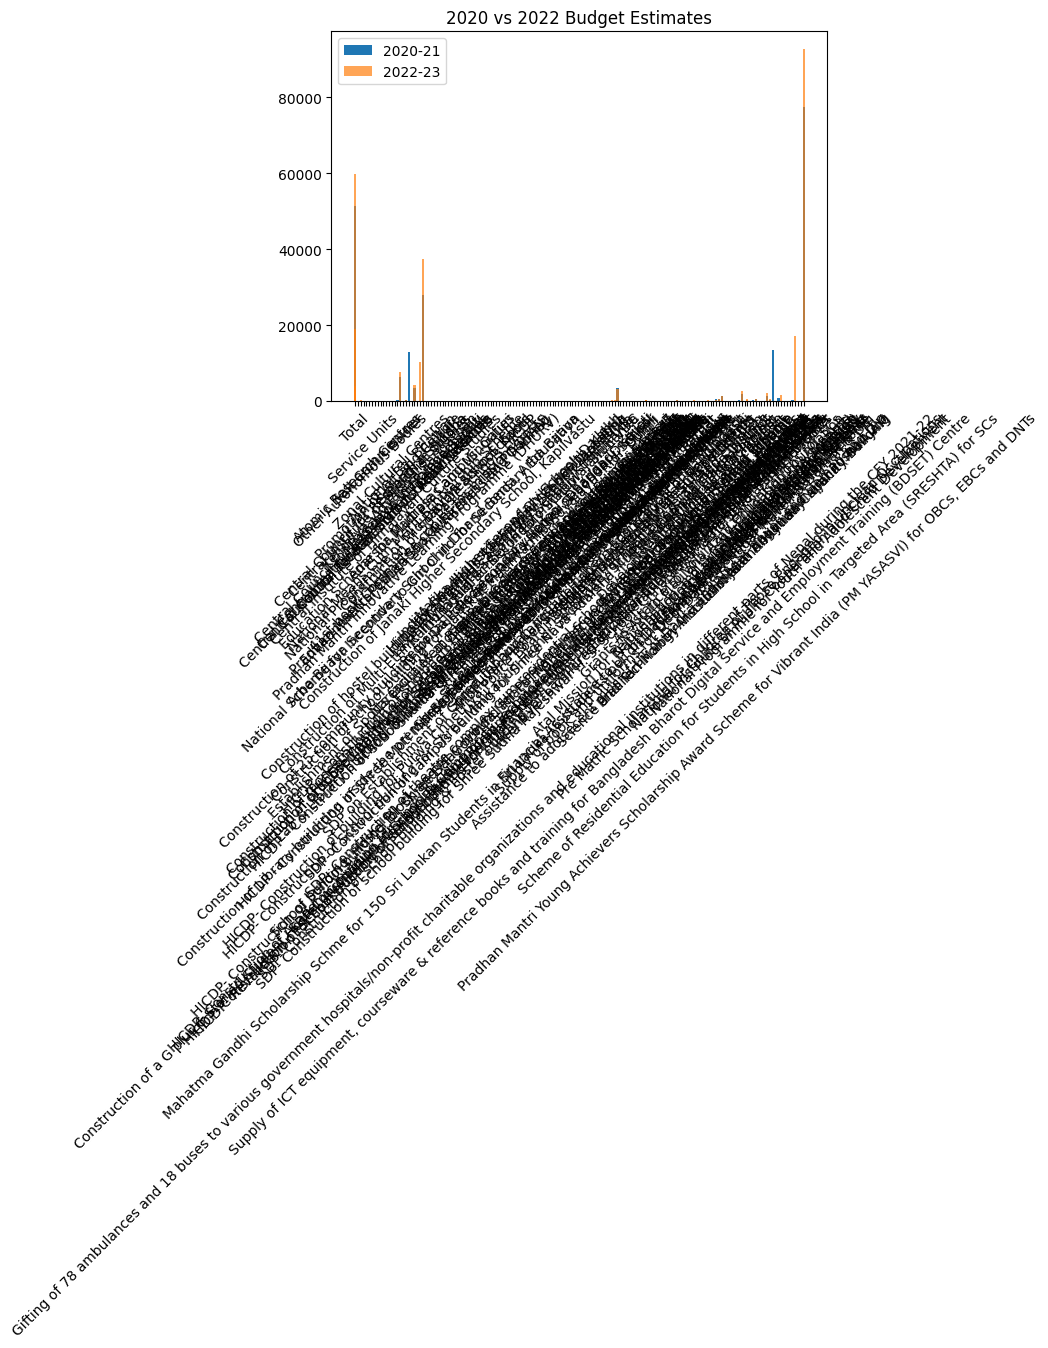

In [26]:
plt.bar(pdf["Scheme"], pdf["2020_2021_Actuals"], label="2020-21")
plt.bar(pdf["Scheme"], pdf["2022_2023_Budget_Estimates"], alpha=0.7, label="2022-23")
plt.xticks(rotation=45)
plt.legend()
plt.title("2020 vs 2022 Budget Estimates")
plt.show()


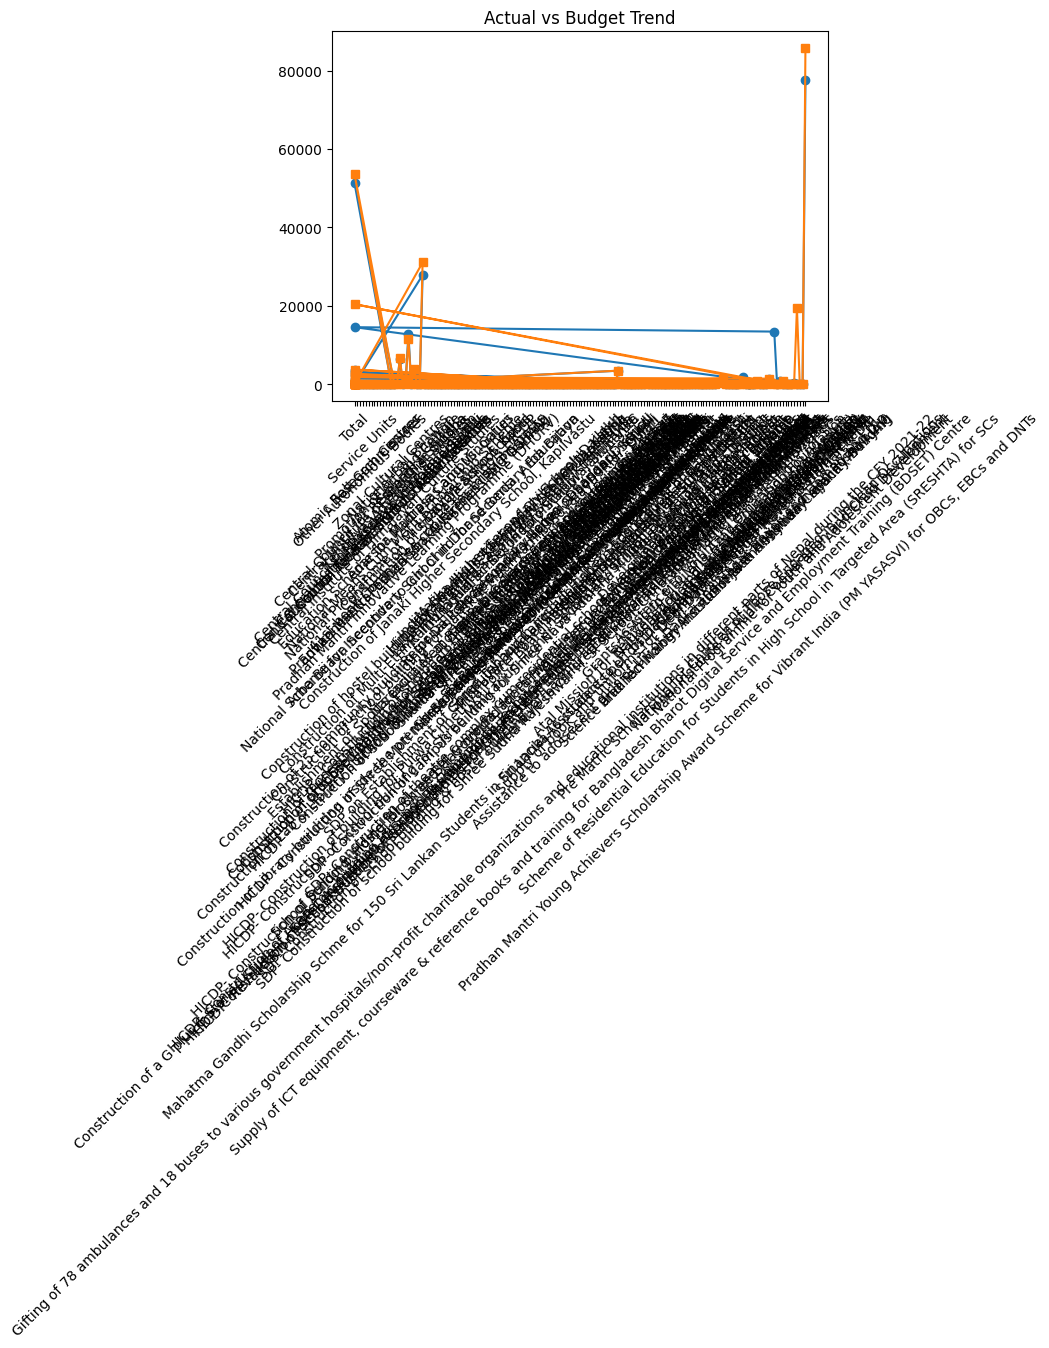

In [27]:
plt.plot(pdf["Scheme"], pdf["2020_2021_Actuals"], marker='o')
plt.plot(pdf["Scheme"], pdf["2021_2022_Budget_Estimates"], marker='s')
plt.title("Actual vs Budget Trend")
plt.xticks(rotation=45)
plt.show()


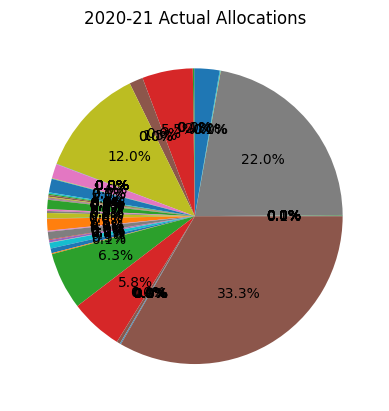

In [35]:
plt.pie(pdf["2020_2021_Actuals"], autopct="%1.1f%%")
plt.title("2020-21 Actual Allocations")
plt.show()


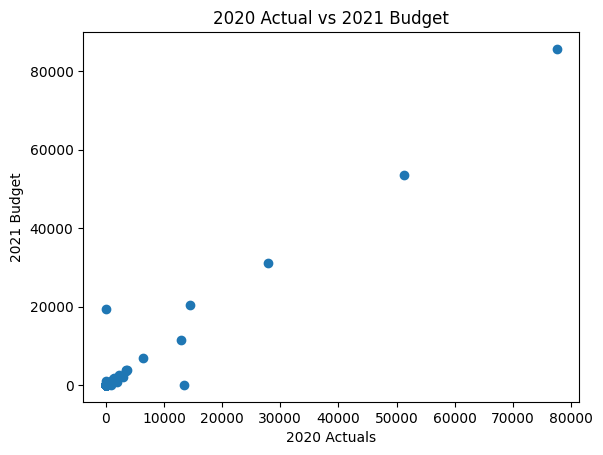

In [29]:
plt.scatter(pdf["2020_2021_Actuals"], pdf["2021_2022_Budget_Estimates"])
plt.title("2020 Actual vs 2021 Budget")
plt.xlabel("2020 Actuals")
plt.ylabel("2021 Budget")
plt.show()


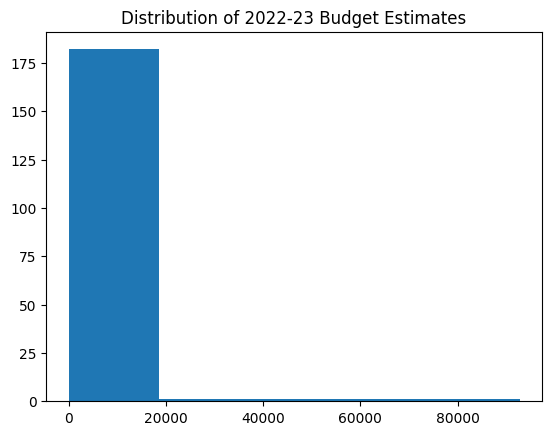

In [30]:
plt.hist(pdf["2022_2023_Budget_Estimates"].dropna(), bins=5)
plt.title("Distribution of 2022-23 Budget Estimates")
plt.show()


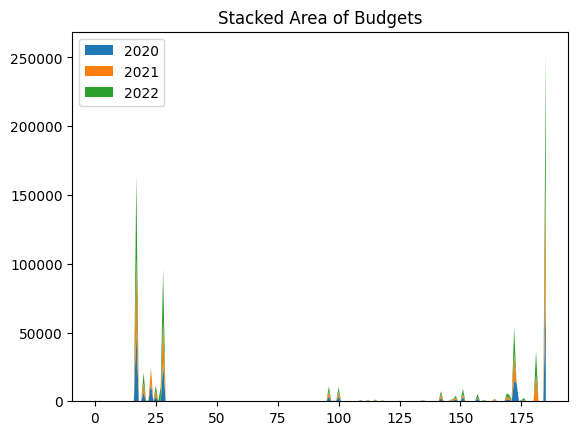

In [31]:
plt.stackplot(range(len(pdf)), pdf["2020_2021_Actuals"], pdf["2021_2022_Budget_Estimates"], pdf["2022_2023_Budget_Estimates"], labels=["2020","2021","2022"])
plt.legend()
plt.title("Stacked Area of Budgets")
plt.show()


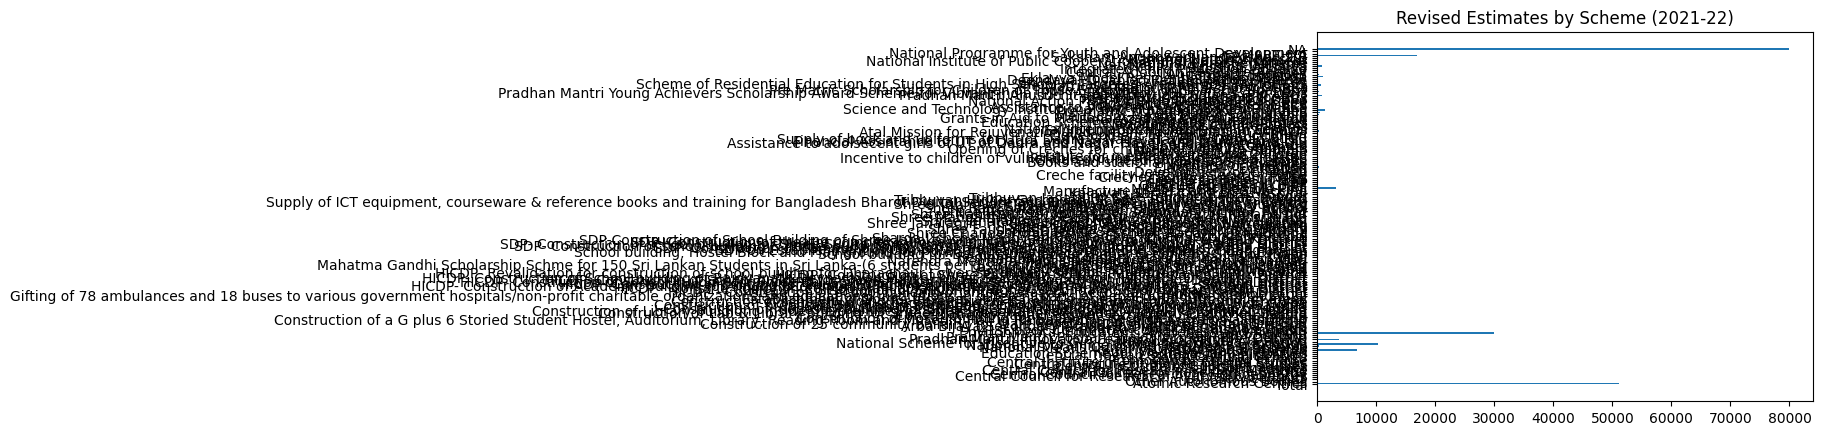

In [32]:
plt.barh(pdf["Scheme"], pdf["2021_2022_Revised_Estimates"])
plt.title("Revised Estimates by Scheme (2021-22)")
plt.show()


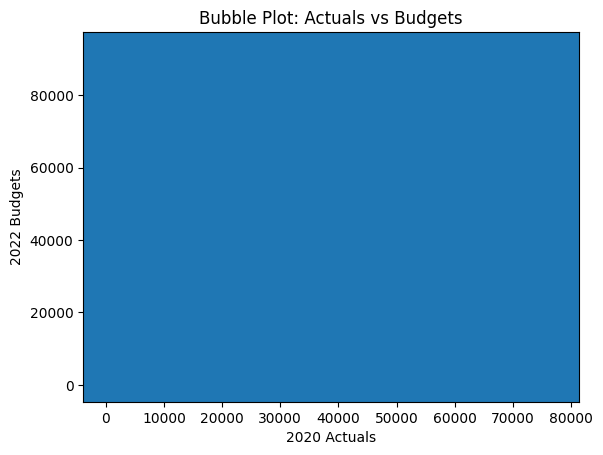

In [33]:
plt.scatter(pdf["2020_2021_Actuals"], pdf["2022_2023_Budget_Estimates"], s=pdf["2021_2022_Budget_Estimates"]*20)
plt.title("Bubble Plot: Actuals vs Budgets")
plt.xlabel("2020 Actuals")
plt.ylabel("2022 Budgets")
plt.show()


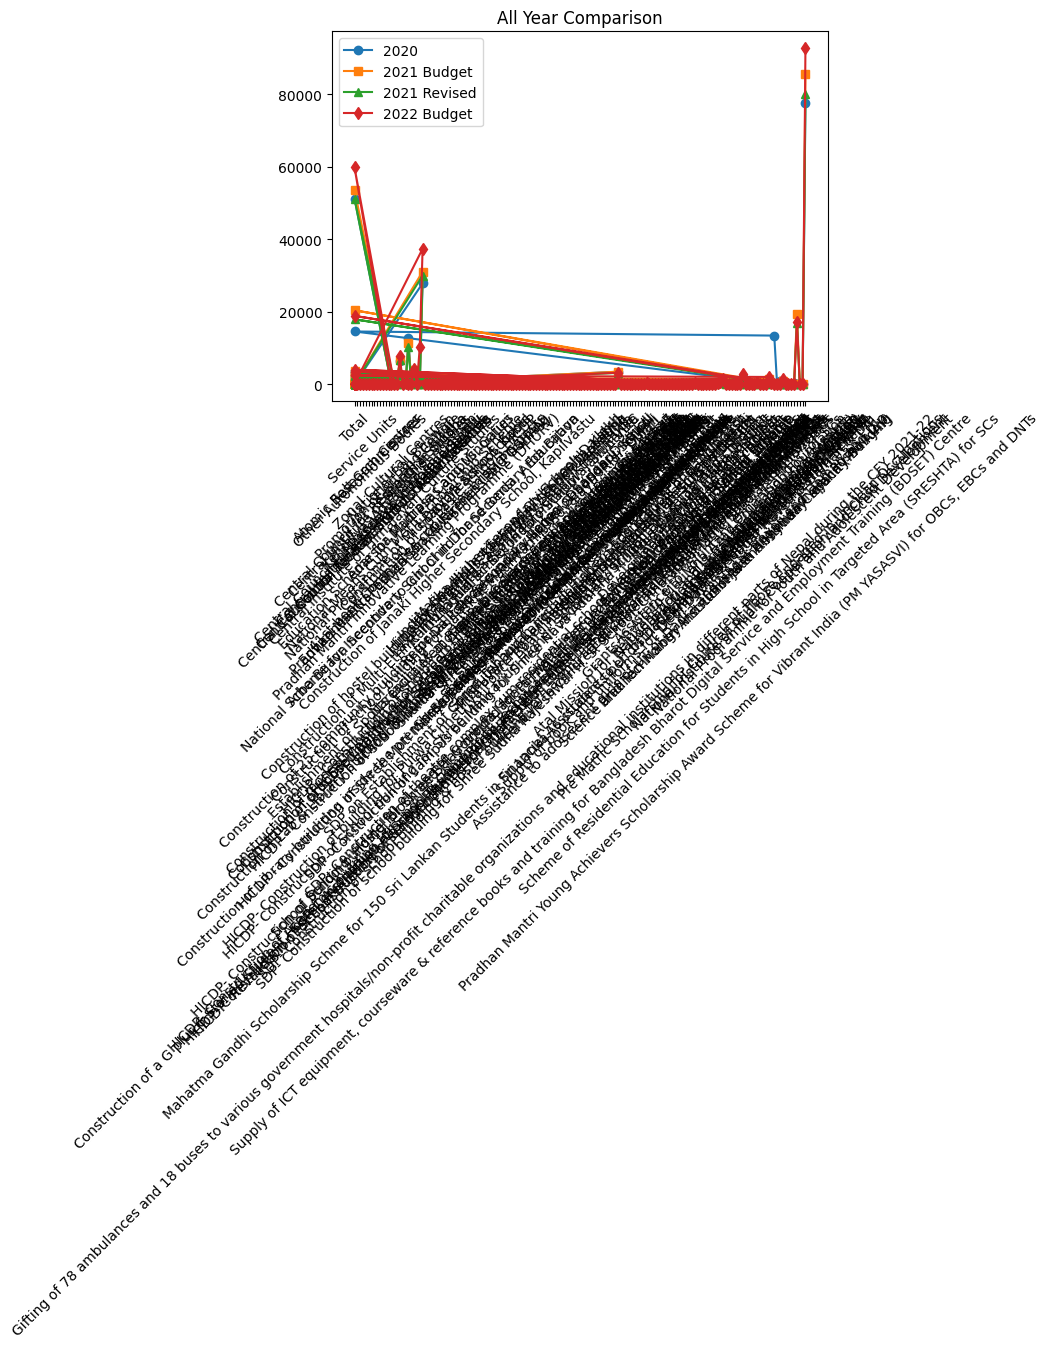

In [34]:
plt.plot(pdf["Scheme"], pdf["2020_2021_Actuals"], marker='o', label='2020')
plt.plot(pdf["Scheme"], pdf["2021_2022_Budget_Estimates"], marker='s', label='2021 Budget')
plt.plot(pdf["Scheme"], pdf["2021_2022_Revised_Estimates"], marker='^', label='2021 Revised')
plt.plot(pdf["Scheme"], pdf["2022_2023_Budget_Estimates"], marker='d', label='2022 Budget')
plt.legend()
plt.xticks(rotation=45)
plt.title("All Year Comparison")
plt.show()


**Conclusion**
The analysis of the Allocations for the Welfare of Children dataset shows that government funding for child welfare programs has steadily increased from 2020 to 2023, reflecting a strong commitment to improving education, health, and social development. However, in several cases, the actual expenditure remains lower than the allocated budget, suggesting underutilization of funds. Major ministries such as Women and Child Development and Housing and Urban Affairs receive the highest allocations, while smaller departments show limited but consistent growth. Overall, the trend indicates progressive investment in child welfare with scope for better fund utilization.
